In [1]:
import re
import pandas as pd 

In [2]:
f=open('WhatsApp Chat with Study group.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(type(data))

<class 'str'>


In [5]:
print(data)

11/26/23, 21:17 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
3/4/24, 17:32 - Hassan Ahmed Uni: <Media omitted>
3/4/24, 17:53 - Ali Kazmi Uni: Yahi Hai bus ?
3/4/24, 17:53 - Ali Kazmi Uni: Theory ??
3/4/24, 17:54 - Abdul Rehman Uni: Sir ny jo lab ma questions batai thy Wohi hain ya????
3/4/24, 17:58 - Abdul Rehman Uni: ?
3/4/24, 17:58 - Hassan Ahmed Uni: 👍 is ka mtlb ni jante?🙂
3/4/24, 17:59 - Hassan Ahmed Uni: Marks length k hisaab se hi answer h
3/4/24, 17:59 - Hassan Ahmed Uni: Na ziada na kam
3/4/24, 17:59 - Muhammad Ghous: Zyada lengthy question NH krna
3/4/24, 17:59 - Ahmed Tanveer: naam likh kr ajain?
3/4/24, 17:59 - Ahmed Tanveer: sath roll no bhi likh dun ga number zayada mil jain gy
3/4/24, 18:00 - Muhammad Ghous: NHI bhai
3/4/24, 18:00 - Muhammad Ghous: 2 hr k paper h
3/4/24, 18:00 - Muhammad Ghous: Lambi NHI krna
3/4/24, 18:00 - Muhammad Ghous: KCH BH likh Kr ajao
3/4/24, 18:00 - Abdul Rehman Uni: Hn 

In [6]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

# pattern=r'(\d{1,2}/\d{1,2}/\d{2,4}),\s(\d{1,2}:\d{2}\s[APMapm]{2})\s-\s(.*?):\s(.*)'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\M Ghous\AppData\Local\Temp\ipykernel_1924\972185519.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'


In [7]:
messages=re.split(pattern,data)[1:]


In [8]:
dates=re.findall(pattern,data)
dates

['11/26/23, 21:17 - ',
 '3/4/24, 17:32 - ',
 '3/4/24, 17:53 - ',
 '3/4/24, 17:53 - ',
 '3/4/24, 17:54 - ',
 '3/4/24, 17:58 - ',
 '3/4/24, 17:58 - ',
 '3/4/24, 17:59 - ',
 '3/4/24, 17:59 - ',
 '3/4/24, 17:59 - ',
 '3/4/24, 17:59 - ',
 '3/4/24, 17:59 - ',
 '3/4/24, 18:00 - ',
 '3/4/24, 18:00 - ',
 '3/4/24, 18:00 - ',
 '3/4/24, 18:00 - ',
 '3/4/24, 18:00 - ',
 '3/4/24, 18:00 - ',
 '3/4/24, 18:01 - ',
 '3/4/24, 18:01 - ',
 '3/4/24, 18:01 - ',
 '3/4/24, 18:01 - ',
 '3/4/24, 18:01 - ',
 '3/4/24, 18:01 - ',
 '3/4/24, 18:01 - ',
 '3/4/24, 18:02 - ',
 '3/4/24, 18:02 - ',
 '3/4/24, 18:02 - ',
 '3/4/24, 18:02 - ',
 '3/4/24, 18:02 - ',
 '3/4/24, 18:02 - ',
 '3/4/24, 18:02 - ',
 '3/4/24, 18:03 - ',
 '3/4/24, 18:03 - ',
 '3/4/24, 18:03 - ',
 '3/4/24, 18:03 - ',
 '3/4/24, 18:03 - ',
 '3/4/24, 20:50 - ',
 '3/4/24, 20:50 - ',
 '3/4/24, 20:52 - ',
 '3/5/24, 16:33 - ',
 '3/5/24, 16:34 - ',
 '3/13/24, 09:00 - ',
 '3/13/24, 09:01 - ',
 '3/13/24, 09:01 - ',
 '3/13/24, 09:01 - ',
 '3/13/24, 09:01 - ',
 '3/13

In [9]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})

# Convert message_date type
df['message_date']=pd.to_datetime(df['message_date'],format='%m/%d/%y, %H:%M - ')

df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2023-11-26 21:17:00
1,Hassan Ahmed Uni: <Media omitted>\n,2024-03-04 17:32:00
2,Ali Kazmi Uni: Yahi Hai bus ?\n,2024-03-04 17:53:00
3,Ali Kazmi Uni: Theory ??\n,2024-03-04 17:53:00
4,Abdul Rehman Uni: Sir ny jo lab ma questions b...,2024-03-04 17:54:00


In [10]:
df.shape

(662, 2)

In [11]:
# Seperate users and messages
users=[]
messages_list=[] # Renamed to avoid conflict with the loop variable 'message'
for message in df['user_message']:
    entry=re.split('([\w\w]+?):\s', message)
    if entry[1:]: #user entry
        users.append(entry[1])
        messages_list.append(entry[2]) # Append to the messages_list
    else:
        users.append('group_notification')
        messages_list.append(entry[0]) # Append to the messages_list

df['user']=users
df['message']=messages_list # Use the messages_list for the DataFrame
df.drop(columns=['user_message'],inplace=True)

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
C:\Users\M Ghous\AppData\Local\Temp\ipykernel_1924\3915433364.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry=re.split('([\w\w]+?):\s', message)


In [12]:
df.head()

,date,user,message
0,2023-11-26 21:17:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2024-03-04 17:32:00,Uni,<Media omitted>\n
2,2024-03-04 17:53:00,Uni,Yahi Hai bus ?\n
3,2024-03-04 17:53:00,Uni,Theory ??\n
4,2024-03-04 17:54:00,Uni,Sir ny jo lab ma questions batai thy Wohi hain...


In [13]:
df['date']

0     2023-11-26 21:17:00
1     2024-03-04 17:32:00
2     2024-03-04 17:53:00
3     2024-03-04 17:53:00
4     2024-03-04 17:54:00
              ...        
657   2025-05-14 23:09:00
658   2025-05-16 01:04:00
659   2025-05-17 11:34:00
660   2025-05-17 11:36:00
661   2025-05-17 11:56:00
Name: date, Length: 662, dtype: datetime64[ns]

In [14]:
df['year']=df['date'].dt.year

In [15]:
df.head(3)

,date,user,message,year
0,2023-11-26 21:17:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023
1,2024-03-04 17:32:00,Uni,<Media omitted>\n,2024
2,2024-03-04 17:53:00,Uni,Yahi Hai bus ?\n,2024


In [16]:
df['month']=df['date'].dt.month_name()

In [17]:
df['day']=df['date'].dt.date

In [18]:
df['hour']=df['date'].dt.hour

In [19]:
df['minute']=df['date'].dt.minute

In [20]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-11-26 21:17:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November,2023-11-26,21,17
1,2024-03-04 17:32:00,Uni,<Media omitted>\n,2024,March,2024-03-04,17,32
2,2024-03-04 17:53:00,Uni,Yahi Hai bus ?\n,2024,March,2024-03-04,17,53
3,2024-03-04 17:53:00,Uni,Theory ??\n,2024,March,2024-03-04,17,53
4,2024-03-04 17:54:00,Uni,Sir ny jo lab ma questions batai thy Wohi hain...,2024,March,2024-03-04,17,54


In [21]:
df[df['user'] =='Hassan Uni'].shape

(0, 8)

In [22]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [23]:
len(words)

3641

In [24]:
from urlextract import URLExtract
extractor=URLExtract()
urls=extractor.find_urls("Let's www.gmail.com have URL stackoverflow.com as an example google.com, http://facebook.com, ftp://url.in .")
urls

['www.gmail.com',
 'stackoverflow.com',
 'google.com',
 'http://facebook.com',
 'ftp://url.in']

In [25]:
links=[]
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [26]:
len(links)

14

In [27]:
df

,date,user,message,year,month,day,hour,minute
0,2023-11-26 21:17:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November,2023-11-26,21,17
1,2024-03-04 17:32:00,Uni,<Media omitted>\n,2024,March,2024-03-04,17,32
2,2024-03-04 17:53:00,Uni,Yahi Hai bus ?\n,2024,March,2024-03-04,17,53
3,2024-03-04 17:53:00,Uni,Theory ??\n,2024,March,2024-03-04,17,53
4,2024-03-04 17:54:00,Uni,Sir ny jo lab ma questions batai thy Wohi hain...,2024,March,2024-03-04,17,54
...,...,...,...,...,...,...,...,...
657,2025-05-14 23:09:00,Ghous,@923129842683 @923472628710 kl shopper LY Kr a...,2025,May,2025-05-14,23,9
658,2025-05-16 01:04:00,Uni,https://www.instagram.com/reel/DJrZoyuMsKi/?ig...,2025,May,2025-05-16,1,4
659,2025-05-17 11:34:00,Ghous,https://www.instagram.com/reel/DJjXwEJMctK/?ig...,2025,May,2025-05-17,11,34
660,2025-05-17 11:36:00,Ghous,https://www.instagram.com/reel/DJADsGcsW89/?ig...,2025,May,2025-05-17,11,36


In [28]:
x=df['user'].value_counts().head()

In [29]:
import matplotlib.pyplot as plt

In [30]:
name=x.index
count=x.values

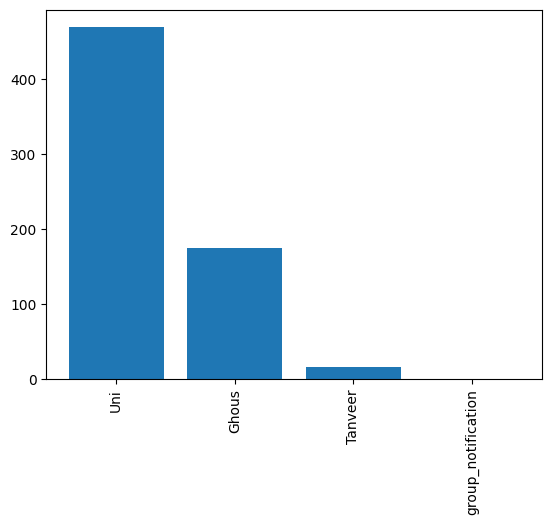

In [31]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,percent,count
0,Uni,70.85
1,Ghous,26.44
2,Tanveer,2.57
3,group_notification,0.15


In [33]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message'] !='<Media omitted\n']

In [34]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()


In [35]:
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [36]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<media,69
1,omitted>,69
2,kia,27
3,class,24
4,question,17
5,mahmood,16
6,@923472628710,14
7,sb,13
8,sy,13
9,join,11


In [37]:
import emoji

In [38]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])


In [39]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,33
1,🤣,5
2,🥹,4
3,🙄,4
4,🫣,3
5,😅,2
6,👽,2
7,😁,2
8,🌝,2
9,😞,2


In [44]:
df['month_num']=df['date'].dt.month


In [47]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [48]:
timeline

,year,month_num,month,message
0,2023,11,November,1
1,2024,3,March,166
2,2024,4,April,22
3,2024,5,May,14
4,2024,7,July,173
5,2024,8,August,14
6,2024,11,November,65
7,2024,12,December,71
8,2025,3,March,117
9,2025,4,April,5


In [51]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-"+str(timeline['year'][i]))

In [53]:
timeline['time']=time

In [54]:
timeline

,year,month_num,month,message,time
0,2023,11,November,1,November-2023
1,2024,3,March,166,March-2024
2,2024,4,April,22,April-2024
3,2024,5,May,14,May-2024
4,2024,7,July,173,July-2024
5,2024,8,August,14,August-2024
6,2024,11,November,65,November-2024
7,2024,12,December,71,December-2024
8,2025,3,March,117,March-2025
9,2025,4,April,5,April-2025


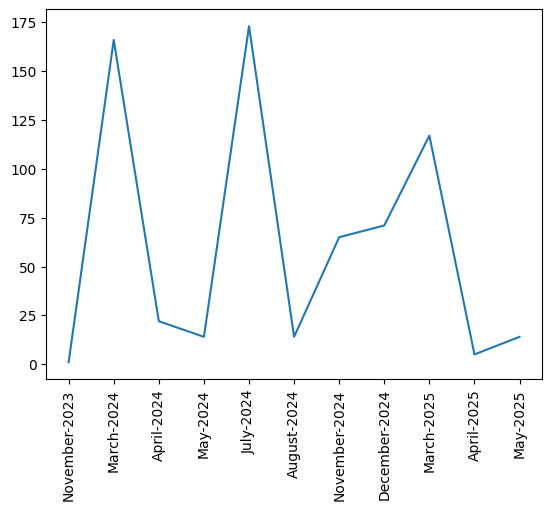

In [56]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df['date_only']=df['date'].dt.date

In [59]:
daily_timeline=df.groupby('date_only').count()['message'].reset_index()

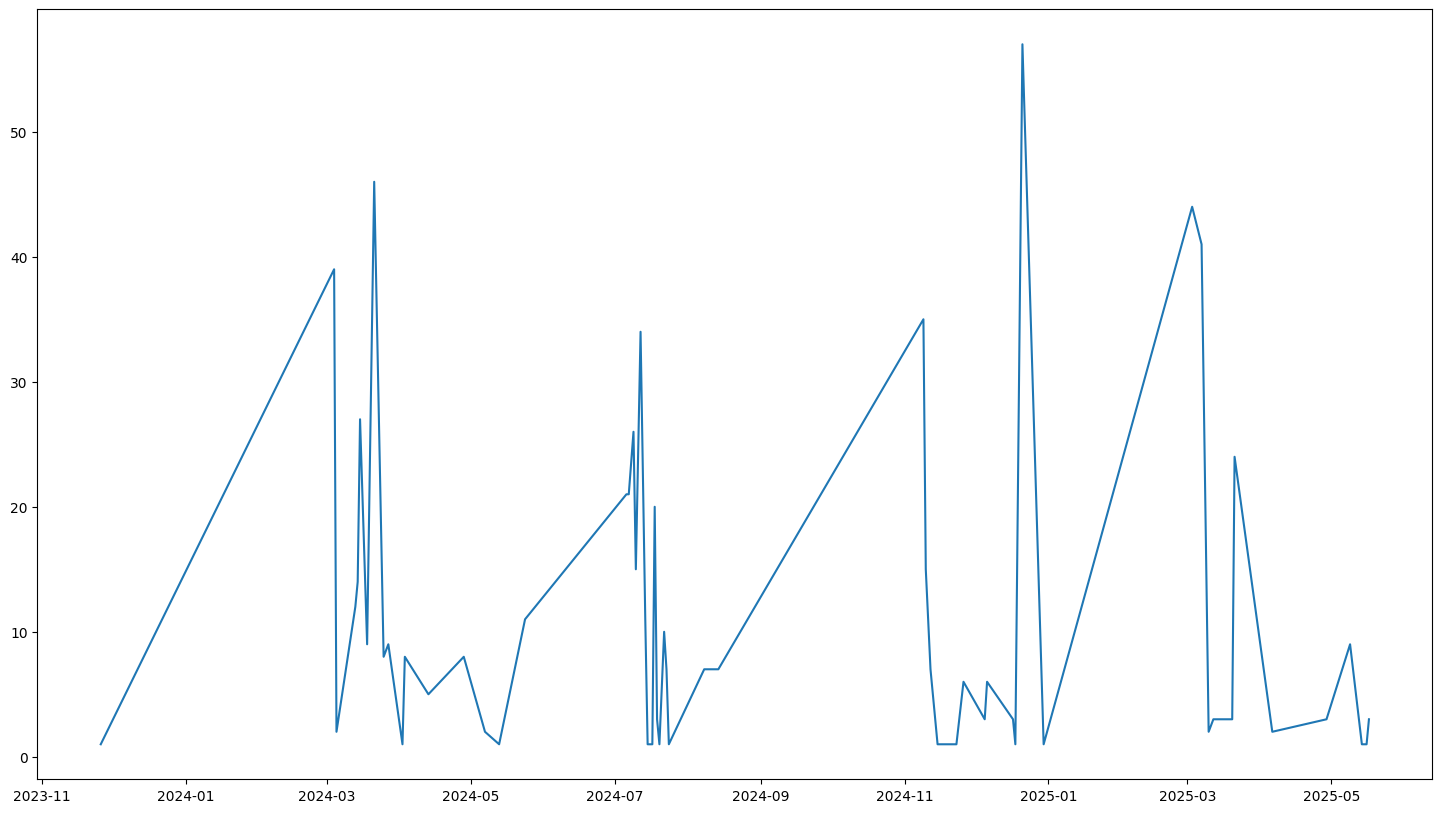

In [61]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['date_only'],daily_timeline['message'])
plt.show()

In [64]:
df['day_name']=df['date'].dt.day_name()

In [65]:
df['day_name'].value_counts()

day_name
Friday       157
Saturday     123
Monday       115
Thursday      93
Sunday        58
Tuesday       58
Wednesday     58
Name: count, dtype: int64

In [66]:
df['month'].value_counts()

month
March       283
July        173
December     71
November     66
May          28
April        27
August       14
Name: count, dtype: int64

In [67]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,date_only,day_name
0,2023-11-26 21:17:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November,2023-11-26,21,17,11,2023-11-26,Sunday
1,2024-03-04 17:32:00,Uni,<Media omitted>\n,2024,March,2024-03-04,17,32,3,2024-03-04,Monday
2,2024-03-04 17:53:00,Uni,Yahi Hai bus ?\n,2024,March,2024-03-04,17,53,3,2024-03-04,Monday
3,2024-03-04 17:53:00,Uni,Theory ??\n,2024,March,2024-03-04,17,53,3,2024-03-04,Monday
4,2024-03-04 17:54:00,Uni,Sir ny jo lab ma questions batai thy Wohi hain...,2024,March,2024-03-04,17,54,3,2024-03-04,Monday


In [68]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour)+ "-"+ str('00'))
    elif hour==0:
        period.append(str('00')+ "-"+ str(hour+1))
    else:
        period.append(str(hour)+ "-"+ str(hour+1))
        

In [69]:
df['period']=period

In [70]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,date_only,day_name,period
2,2024-03-04 17:53:00,Uni,Yahi Hai bus ?\n,2024,March,2024-03-04,17,53,3,2024-03-04,Monday,17-18
445,2024-11-12 18:22:00,Ghous,Question Bary h answer k darshan Choty h\n,2024,November,2024-11-12,18,22,11,2024-11-12,Tuesday,18-19
310,2024-07-12 14:28:00,Uni,Mujy\n,2024,July,2024-07-12,14,28,7,2024-07-12,Friday,14-15
357,2024-07-20 22:50:00,Uni,<Media omitted>\n,2024,July,2024-07-20,22,50,7,2024-07-20,Saturday,22-23
454,2024-11-26 21:07:00,Ghous,Idk\n,2024,November,2024-11-26,21,7,11,2024-11-26,Tuesday,21-22


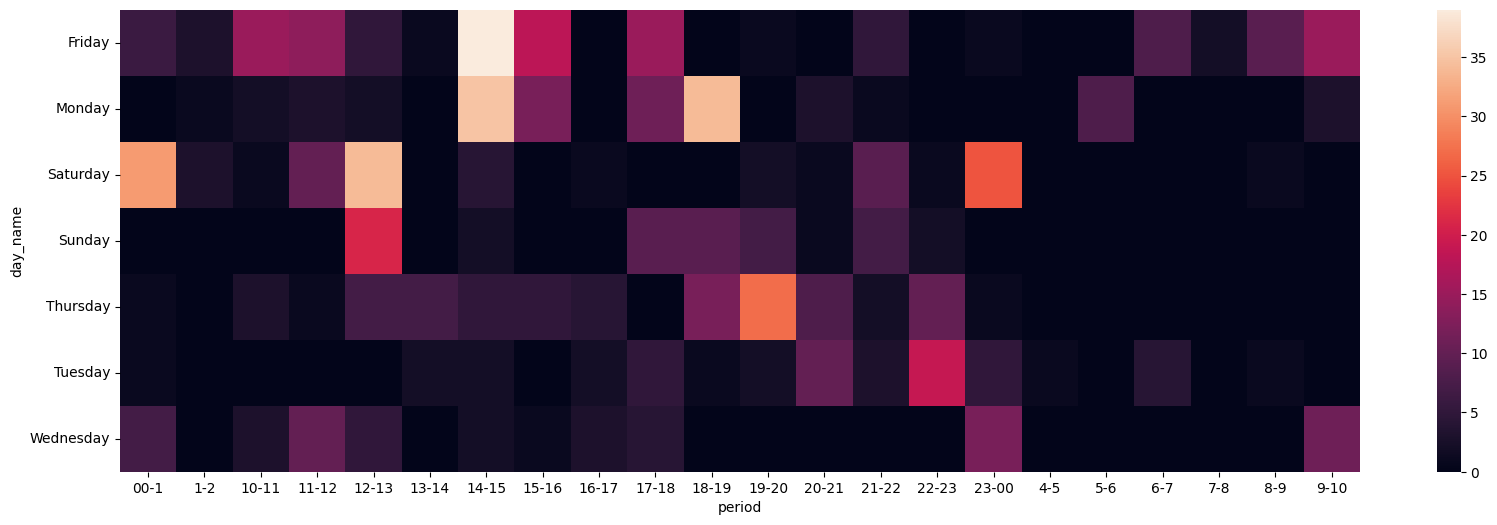

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [72]:
df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,20-21,21-22,22-23,23-00,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,6.0,3.0,15.0,14.0,5.0,1.0,39.0,18.0,0.0,15.0,...,0.0,5.0,0.0,1.0,0.0,0.0,8.0,2.0,9.0,15.0
Monday,0.0,1.0,2.0,3.0,2.0,0.0,35.0,12.0,0.0,11.0,...,3.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,3.0
Saturday,31.0,3.0,1.0,10.0,34.0,0.0,4.0,0.0,1.0,0.0,...,1.0,9.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0
Sunday,0.0,0.0,0.0,0.0,21.0,0.0,2.0,0.0,0.0,9.0,...,1.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thursday,1.0,0.0,3.0,1.0,7.0,7.0,5.0,5.0,4.0,0.0,...,8.0,2.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Tuesday,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,5.0,...,10.0,3.0,19.0,5.0,1.0,0.0,4.0,0.0,1.0,0.0
Wednesday,7.0,0.0,3.0,10.0,5.0,0.0,2.0,1.0,3.0,4.0,...,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,11.0
